The durations are indicative and obviously depend on each person. If you see that you can't finish an exercise in time, don't hesitate to move to the next exercise.

If you don't have time to finish everything, you can start again this weekend or next week. You will simply indicate in the comments the scripts you have completed afterwards.

In [ ]:
import pandas as pd
import numpy as np

import folium
import requests
import json

# Part 1 - API - around 1h

The following dataset lists a selection of the best restaurants in Paris, at very affordable prices (less than 15 euros per menu on average).
You will use this  [API](https://adresse.data.gouv.fr/api-doc/adresse), to retrieve coordinate points (lon, lat) for each restaurants.



In [ ]:
food_paris = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/food.csv").drop(columns = "Unnamed: 0")

In [ ]:
food_paris.head()

,nom,adresse,code postal
0,Kodawari Tsukiji,12 Rue de Richelieu,75001 Paris
1,Café Lai’Tcha,7 Rue du Jour,75001 Paris
2,Pizz'Aria,55 Rue Montmartre,75002 Paris
3,M La Vie,85 Rue Montmartre,75002 Paris
4,Road Trip,36 Rue Poissonnière,75002 Paris


In [ ]:
# https://api-adresse.data.gouv.fr/search/?q=12%20Rue%20de%20Richelieu&postcode=75001

response = requests.get('https://api-adresse.data.gouv.fr/search/?q=12 Rue de Richelieu&postcode=75001')

result = response.json()

print(result)

{'type': 'FeatureCollection', 'version': 'draft', 'features': [{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [2.336258, 48.864374]}, 'properties': {'label': '12 Rue de Richelieu 75001 Paris', 'score': 0.9661545454545454, 'housenumber': '12', 'id': '75101_8212_00012', 'name': '12 Rue de Richelieu', 'postcode': '75001', 'citycode': '75101', 'x': 651306.61, 'y': 6862909.38, 'city': 'Paris', 'district': 'Paris 1er Arrondissement', 'context': '75, Paris, Île-de-France', 'type': 'housenumber', 'importance': 0.6277, 'street': 'Rue de Richelieu'}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [2.336521, 48.864671]}, 'properties': {'label': 'Passage de Richelieu 75001 Paris', 'score': 0.48719272727272717, 'id': '75101_8211', 'name': 'Passage de Richelieu', 'postcode': '75001', 'citycode': '75101', 'x': 651326.18, 'y': 6862942.24, 'city': 'Paris', 'district': 'Paris 1er Arrondissement', 'context': '75, Paris, Île-de-France', 'type': 'street', 'importance': 

In [ ]:
result['features'][0]['geometry']['coordinates'][::-1]

[48.864374, 2.336258]

In [ ]:
result['features'][0]['properties']['district']

'Paris 1er Arrondissement'

In [ ]:
def fn_find_json_data(search):
    list_find = []

    for adress, postcode in zip (food_paris['adresse'], food_paris['code postal']):

    # J'essaye d'exécuter ma requête api
        try:
            # postcode[:5] peut être remplacé par re.search('\d+', postcode).group(0), si vous préférez le regex
            response = requests.get(f"http://api-adresse.data.gouv.fr/search/?q={adress}&postcode={postcode[:5]}")

            match search:

                case 'district':
                    search_value = response.json()['features'][0]['properties']['district']

                case 'coordinates':
                    search_value = response.json()['features'][0]['geometry']['coordinates'][::-1]

                case _:
                    print('Pas de traitement prévu pour cette variable')
                    break

        # Si elle fonctionne & que son contenu n'est pas vide, je mets les coordonnées dans une liste
            if response.status_code == 200 and len(response.json().get('features')) > 0:

                list_find.append(search_value)

        except:
        # Si ma requête ne fonctionne pas et/ou qu'elle est vide
            print(f'Try response : {response} for the adress : {adress}')

    # Nouvelle vérification que tout s'est bien passé
    if food_paris.shape[0] == len(list_find):
        print('Récupération des données : OK!')

    # Tout est ok, je peux ajouter les coordonnées à mon df
        food_paris[search] = list_find
        print(f"food_paris['{search}'] créée !")

    else:
        print(f'len du dataset : {food_paris.shape[0]} vs len list_find : {len(list_find)}')

In [ ]:
for element in ['coordinates', 'district']:
  fn_find_json_data(element)

Récupération des données : OK!
food_paris['coordinates'] créée !
Récupération des données : OK!
food_paris['district'] créée !


In [ ]:
food_paris.head(3)

,nom,adresse,code postal,coordinates,district
0,Kodawari Tsukiji,12 Rue de Richelieu,75001 Paris,"[48.864374, 2.336258]",Paris 1er Arrondissement
1,Café Lai’Tcha,7 Rue du Jour,75001 Paris,"[48.86355, 2.344247]",Paris 1er Arrondissement
2,Pizz'Aria,55 Rue Montmartre,75002 Paris,"[48.865983, 2.344484]",Paris 2e Arrondissement


# Folium

You will now project these restaurants on a map, using the `Folium` library.

In [ ]:
list_lon = [coord[0] for coord in food_paris['coordinates']]
list_lat = [coord[1] for coord in food_paris['coordinates']]

In [ ]:
np.mean(list_lon)

48.865460034482766

In [ ]:
map = folium.Map(location=[np.mean(list_lon), np.mean(list_lat)], zoom_start=13.4)

for loc, name, loc_adress in zip(food_paris['coordinates'], food_paris['nom'], food_paris['adresse']):
  folium.Marker(location=loc, popup=f'{name} \n {loc_adress}').add_to(map)

map

# Sorting and grouping

You can now build a descending ranking,  considering the number of restaurants per district.

In [ ]:
food_paris.head(2)

,nom,adresse,code postal,coordinates,district
0,Kodawari Tsukiji,12 Rue de Richelieu,75001 Paris,"[48.864374, 2.336258]",Paris 1er Arrondissement
1,Café Lai’Tcha,7 Rue du Jour,75001 Paris,"[48.86355, 2.344247]",Paris 1er Arrondissement


In [ ]:
food_paris.groupby(by='district').count()['adresse'].sort_values(ascending=False)

district
Paris 2e Arrondissement     5
Paris 10e Arrondissement    4
Paris 9e Arrondissement     4
Paris 11e Arrondissement    3
Paris 1er Arrondissement    2
Paris 3e Arrondissement     2
Paris 4e Arrondissement     2
Paris 6e Arrondissement     2
Paris 8e Arrondissement     2
Paris 14e Arrondissement    1
Paris 17e Arrondissement    1
Paris 7e Arrondissement     1
Name: adresse, dtype: int64

# Part 2 - Data exploration & processing - Python & Pandas - around 30 min

Run the code below. You will get a DataFrame with 10 000 restaurant comments.
- date: the date of the comment
- stars: the rating (from 1 to 5)
- text: the text of the review
- useful: the number of users who indicated this comment as "useful"
- sentiment: the word "good" or "bad" depending on the stars rating

The goal of these parts will be to explore this dataset, then to propose a prediction model of positive rating according to the other features.

Start by checking that there are no missing values.

In [ ]:
import pandas as pd
df_restaurants = pd.read_csv("https://github.com/WildCodeSchool/wilddata/raw/main/restaurant.zip", index_col='Unnamed: 0').loc[:,["date", "stars", "text", "useful"]]
df_restaurants["sentiment"] = df_restaurants["stars"].apply(lambda x: "bad" if x <=3 else "good")
df_restaurants

,date,stars,text,useful,sentiment
0,2011-01-26,5,My wife took me here on my birthday for breakf...,5,good
1,2011-07-27,5,I have no idea why some people give bad review...,0,good
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,1,good
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,good
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,good
...,...,...,...,...,...
9995,2012-07-28,3,First visit...Had lunch here today - used my G...,2,bad
9996,2012-01-18,4,Should be called house of deliciousness!\n\nI ...,0,good
9997,2010-11-16,4,I recently visited Olive and Ivy for business ...,0,good
9998,2012-12-02,2,My nephew just moved to Scottsdale recently so...,0,bad


In [ ]:
df_restaurants['len_text'] = df_restaurants['text'].apply(lambda x: len(x))

df_restaurants.head(3)

,date,stars,text,useful,sentiment,len_text
0,2011-01-26,5,My wife took me here on my birthday for breakf...,5,good,889
1,2011-07-27,5,I have no idea why some people give bad review...,0,good,1345
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,1,good,76


## Column "text"

Use **apply** to create a new column `len_text`, indicating the length (number of characters) of each comment.

Draw a histogram and a boxplot to represent the distribution of this "len_text" column. Are the values well distributed? Are most comments long or short?

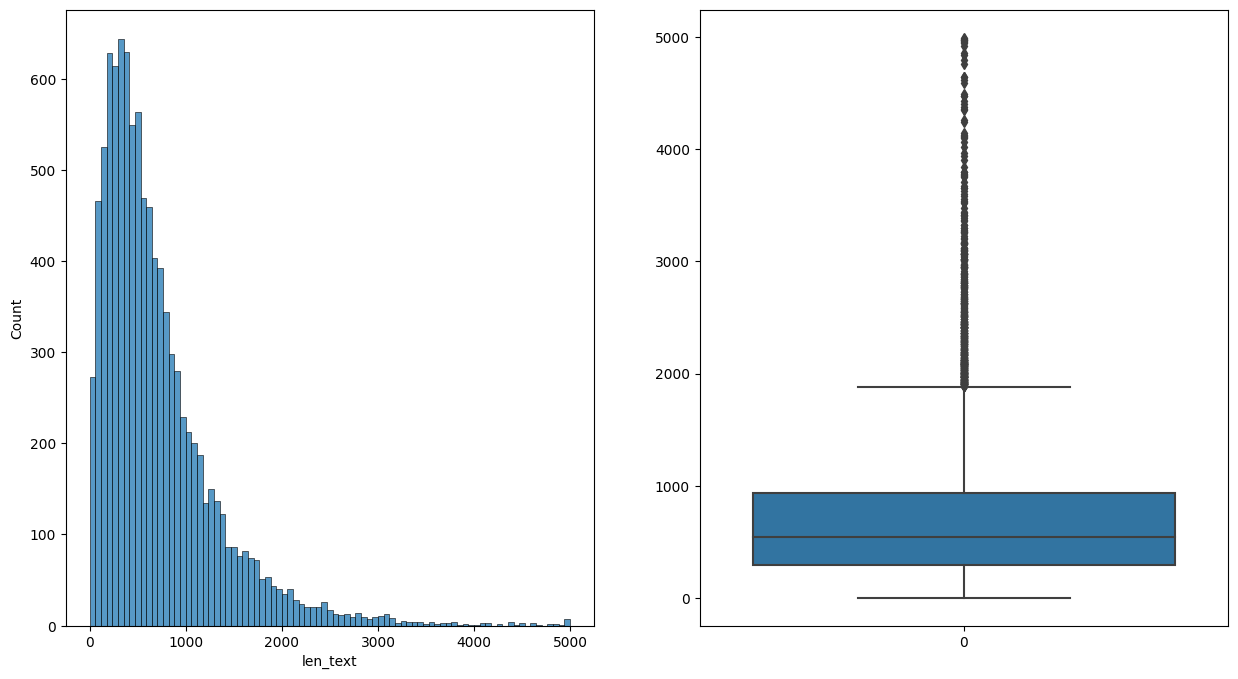

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Histogram & boxplot to represent the distribution

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 8))

sns.histplot(df_restaurants['len_text'], ax=axes[0])
sns.boxplot(df_restaurants['len_text'], ax=axes[1])

plt.show()

In [ ]:
# N'OUBLIIEZ PAS LA LEGENDE, ETC... (FAIS RAPIDEMENT POUR LA CORRECTION)

PAS D OUTLIERS DANS CE CAS. CE SONT DES COMMENTAIRES PLUS LONG UNIQUEMENT
LA QUASI TOTALITE DES COMMENTAIRES ONT MOINS DE 2000 CARACTERES
LA DISTRIBUTION SUIT UNE LOI DE PROBABILITE A QUEUE LOURDE

## Column "stars"

- Draw a scatterplot to compare the `useful` column and the `stars` column. Do you think there is a correlation? Please compute the correlation coefficient.

- Ditto between `len_text` and `useful`.

- Please comment and interpret the results.



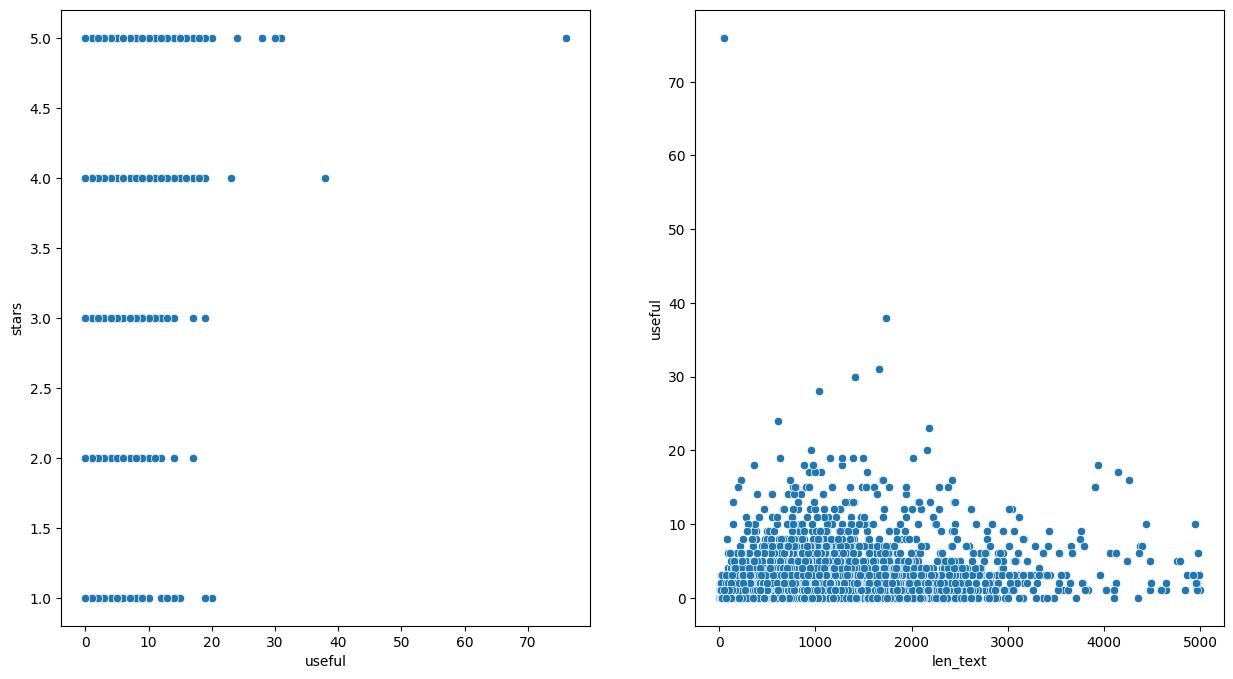

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 8))

sns.scatterplot(data=df_restaurants, x='useful' , y='stars', ax=axes[0])
sns.scatterplot(data=df_restaurants, x='len_text' , y='useful', ax=axes[1])

plt.show()

In [ ]:
df_restaurants['useful'].corr(df_restaurants['len_text'])

0.29397538215526103

In [ ]:
<0.1 PAS DE CORRELATION
0.1< <0.3 CORRELATION FAIBLE
0.3< <0.5 CORRELATION MOYENNE
0.5< <0.7 CORRELATION ELEVEE
<0.7 FORTE CORRELATION

# Part 3 : NLP - Sentiment analysis classification - 2h

Define `X` which will contain only the `text` column. And `y` will be the `sentiment` column.

In [1]:
import pandas as pd
df_restaurants = pd.read_csv("https://github.com/WildCodeSchool/wilddata/raw/main/restaurant.zip", index_col='Unnamed: 0').loc[:,["date", "stars", "text", "useful"]]
df_restaurants["sentiment"] = df_restaurants["stars"].apply(lambda x: "bad" if x <=3 else "good")
df_restaurants

,date,stars,text,useful,sentiment
0,2011-01-26,5,My wife took me here on my birthday for breakf...,5,good
1,2011-07-27,5,I have no idea why some people give bad review...,0,good
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,1,good
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,good
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,good
...,...,...,...,...,...
9995,2012-07-28,3,First visit...Had lunch here today - used my G...,2,bad
9996,2012-01-18,4,Should be called house of deliciousness!\n\nI ...,0,good
9997,2010-11-16,4,I recently visited Olive and Ivy for business ...,0,good
9998,2012-12-02,2,My nephew just moved to Scottsdale recently so...,0,bad


In [2]:
X = df_restaurants['text']
y = df_restaurants['sentiment']

## Create a function to clean up stopwords and punctuation

You can call your function `func_clean`.
Your function must take a `str` as a single parameter, and return a `str`.

For example:

`func_clean("Hello, how are you? Fine, thank you.")`

`>>> 'hello fine thank'`

In [3]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [7]:
def func_clean(text):
  token_word = nltk.word_tokenize(text.lower())

  token_word_clean = [word for word in token_word
                      if word not in nltk.corpus.stopwords.words('english') and word.isalpha()]

  return(' '.join(token_word_clean))

func_clean(df_restaurants['text'][0])

'wife took birthday breakfast excellent weather perfect made sitting outside overlooking grounds absolute pleasure waitress excellent food arrived quickly saturday morning looked like place fills pretty quickly earlier get better favor get bloody mary phenomenal simply best ever pretty sure use ingredients garden blend fresh order amazing everything menu looks excellent white truffle scrambled eggs vegetable skillet tasty delicious came pieces griddled bread amazing absolutely made meal complete best toast ever anyway ca wait go back'

## Apply this function

Apply this function to `X` and store the result in `X_clean`.

In [8]:
X_clean = X.apply(func_clean)
X_clean

0       wife took birthday breakfast excellent weather...
1       idea people give bad reviews place goes show p...
2       love gyro plate rice good also dig candy selec...
3       rosie dakota love chaparral dog park convenien...
4       general manager scott petello good egg go deta...
                              ...                        
9995    first visit lunch today used groupon ordered b...
9996    called house deliciousness could go item item ...
9997    recently visited olive ivy business last week ...
9998    nephew moved scottsdale recently bunch friends...
9999    locations star average think arizona really fa...
Name: text, Length: 10000, dtype: object

## Train test split

Split your `X_clean` and `y` data with a train test split, and the same `random_state = 32`.



In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_clean, y, random_state=32)

## TfidfVectorizer

- Train `TfidfVectorizer` on `X_train`.
- Transform `X_train` with your vectorizer and store the result in `X_train_vecto`.
- Transform `X_test` with your vectorizer and store the result in `X_test_vecto`.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)


X_train_vecto = vectorizer.transform(X_train)
X_test_vecto = vectorizer.transform(X_test)

display(X_train_vecto, X_test_vecto)

<7500x24386 sparse matrix of type '<class 'numpy.float64'>'
	with 410410 stored elements in Compressed Sparse Row format>

<2500x24386 sparse matrix of type '<class 'numpy.float64'>'
	with 128871 stored elements in Compressed Sparse Row format>

## Logistic regression

Train a logistic regression on `X_train_vecto` and `y_train`.

Please compare the accuracy scores of the training and test sets. Is there any overfitting?

Also display a confusion matrix for the test set. How many "bad" comments are correctly predicted?

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

Model_LogReg = LogisticRegression()
Model_LogReg.fit(X_train_vecto, y_train)

print(f'{Model_LogReg.score(X_train_vecto, y_train)} \n'
f'{Model_LogReg.score(X_test_vecto, y_test)}')

0.8948 
0.834


In [16]:
pd.DataFrame(data=confusion_matrix(y_true = y_test, y_pred = Model_LogReg.predict(X_test_vecto)),
              index = Model_LogReg.classes_ + 'Actual',
             columns = Model_LogReg.classes_ + 'Predicted')

,badPredicted,goodPredicted
badActual,427,327
goodActual,88,1658


## Decision tree
Train a decision tree on `X_train_vecto` and `y_train`.

Please compare the accuracy scores of the training and test sets. Is there any overfitting? Are the scores better than previously?

In [18]:
from sklearn.tree import DecisionTreeClassifier
Model_DTC = DecisionTreeClassifier()

Model_DTC.fit(X_train_vecto, y_train)

DecisionTreeClassifier()

In [20]:
print(Model_DTC.score(X_train_vecto, y_train))
print(Model_DTC.score(X_test_vecto, y_test))


1.0
0.6968


## Bonus question (optional)

Use `GridsearchCV` to find the best parameters.
Make sure you don't do more than 1000 different iterations (i.e. combinations).
Otherwise, the time may seem very long...





In [21]:
Model_LogReg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [29]:
from sklearn.model_selection import GridSearchCV

params_grid = {'penalty' : ['l1', 'l2'], 'C' : [1,1.5, 2, 4 , 10], 'max_iter': [100,500, 1000]}

grid_search_Log_Reg = GridSearchCV(estimator=Model_LogReg, param_grid=params_grid, cv=5)

grid_search_Log_Reg.fit(X_train_vecto, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 1.5, 2, 4, 10], 'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2']})

In [26]:
display(grid_search_Log_Reg.best_params_, grid_search_Log_Reg.best_score_)

{'C': 4, 'max_iter': 100, 'penalty': 'l2'}

0.8272

In [28]:
import warnings
warnings.filterwarnings('ignore')

# Part 4 : `JSON` manipulation.
This is a json file containing several keys.
Each key has a value, which could potentially be another key, containing another value, which could potentially be another key etc...

In [ ]:
food = {
  "clé1": {
    "fruit1": "pomme",
    "légume4": "brocoli"
  },
  "clé2": {
    "légume1": "carotte",
    "fruit5": "banane",
    "légume3": "courgette"
  },
  "clé3": {
    "niveau1": {
      "niveau2": {
        "fruit3": "orange",
        "légume5": "aubergine",
        "fruit5": "mangue"
      }
    }
  },
  "clé4": {
    "niveau1": {
      "niveau2": {
        "niveau3": {
          "fruit6": "raisin",
          "fruit7": "fraise",
          "légume4": "poivron",
          "fruit2": "pastèque"
        }
      }
    }
  }
}


Problem:
Fruits and vegetables have been misplaced in this json file. The goal is to retrieve each of the fruits and vegetables, and assign them to two corresponding lists: `fruits_list` & `vegetables_list`.

Expected solution:

`fruits_list` = `['pomme', 'banane', 'orange', 'mangue', 'raisin', 'fraise', 'pastèque']`

`vegetables_list` = `['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']`



In [ ]:
fruits_list, vegetables_list = [], []

def fn_retrieve(data_json):

  for key in data_json.keys():
    if 'fruit' in key: fruits_list.append(data_json[key])

    elif 'légume' in key : vegetables_list.append(data_json[key])

    else: fn_retrieve(data_json[key])

fn_retrieve(food)

Next, you'll create a new dictionary, which will simply contain two keys: `fruits` & `vegetables`. Each key will have the value of the list of fruits and the list of vegetables. That way, everything will be in order.

Expected solution:
`food_dict` = `{'fruits': ['pomme',
  'banane',
  'orange',
  'mangue',
  'raisin',
  'fraise',
  'pastèque'],
 'legumes': ['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']}`

In [ ]:
food_dict = {'fruits' : fruits_list, 'legumes' : vegetables_list}
food_dict

{'fruits': ['pomme',
  'banane',
  'orange',
  'mangue',
  'raisin',
  'fraise',
  'pastèque'],
 'legumes': ['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']}